In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import math

In [64]:
musicData = pd.read_csv('dataset-of-10s.csv')

In [65]:
musicData.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1


## First section - Linear Regression

### Question 1

We would like to check how loudness, speechiness and key affect the valence. <br>
The feature loudness shows how loud the song in decibels, the feature of speechiness explains how much words are present and dominant in a song, <br>
the feature of key presents the overall estimated key of the track (C, D and so on...). <br>
Finally, the valence represents the positibity (happy, cheerful etc...) or negativity (sad, angry etc...) of the song while closer to 1 means positive and closer to 0 means negative.

$$ Y_{valence}=\beta_0 + \beta_1x_{loudness} + \beta_2x_{speechiness} + \beta_3x_{key} $$

### Question 2
We sampled 200 rows from the dataset

In [66]:
modelData = musicData[['loudness','speechiness','key','valence']]
sampledData = modelData.sample(200, random_state=1)

### Question 3

#### 3A

In [67]:
def plot_hist(feature, dist=False, d=0):
    fig = plt.figure(figsize=(10, 6), dpi=80, facecolor='w', edgecolor='black')
    ax = fig.add_subplot(221)
    ax.set_title(feature)
    values = sampledData[feature]
    if d:
        values = sampledData[sampledData[feature] == d]['valence']
        ax.set_title('valence values as a function of key {}'.format(d))
    if dist:
        values.plot.kde(ax=ax, legend=False, title=feature, color='blue')
    values.plot.hist(density=dist, ax=ax)
    ax.set_xlim([values.min() - 0.1, values.max() + 0.1])

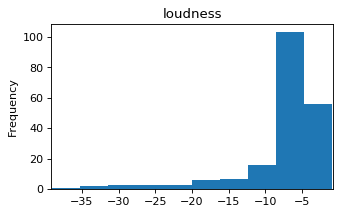

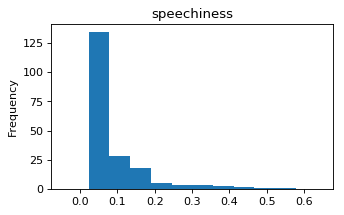

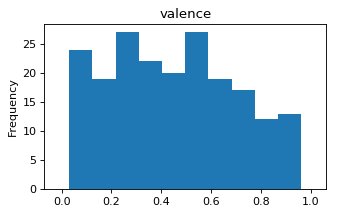

In [68]:
for feature in ['loudness','speechiness','valence']:
    plot_hist(feature, False)

In [69]:
print('Key variable:')
sampledData.describe()['key']

Key variable:


count    200.000000
mean       5.195000
std        3.716995
min        0.000000
25%        2.000000
50%        5.000000
75%        9.000000
max       11.000000
Name: key, dtype: float64

#### 3B

##### There is no missing data in our sampled data

In [70]:
sampledData.isnull().values.any()

False

##### We see that only the key feature is somewhat semetric while loudness and speechiness are not.
##### We can see that valence is close to semetric.

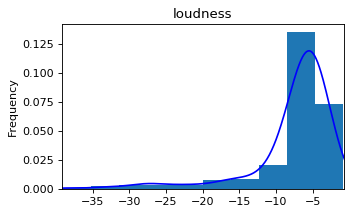

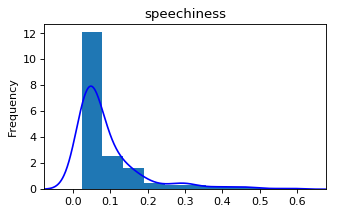

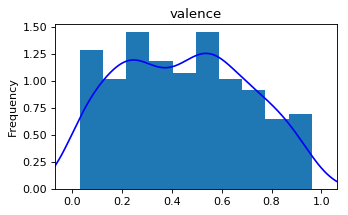

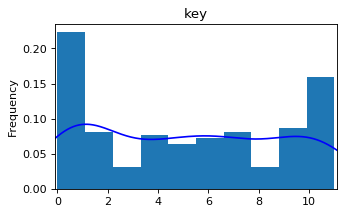

In [71]:
for feature in ['loudness','speechiness','valence','key']:
    plot_hist(feature, True)

#### 3C

In [72]:
def plot_fit_x_y(feature,label):
    fig = plt.figure(figsize=(10, 6), dpi=80, facecolor='w', edgecolor='black')
    ax = fig.add_subplot(221)
    plt.plot(sampledData[feature], sampledData[label], 'o')
    m, b = np.polyfit(sampledData[feature], sampledData[label], 1)
    plt.plot(sampledData[feature], m*sampledData[feature] + b)
    ax.set_title('effect of {} on {}'.format(feature, label))
    plt.show()

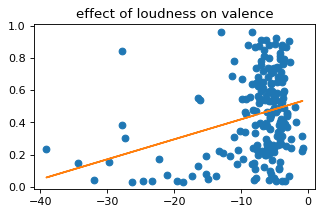

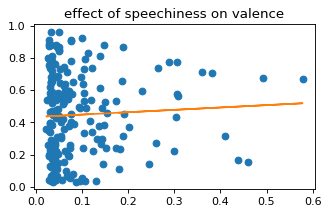

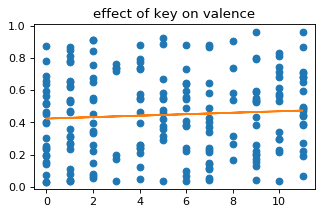

In [73]:
for feature in ['loudness','speechiness','key']:
    plot_fit_x_y(feature, 'valence')

##### We can see that the feature loudness has the largest impact on our target valence.

#### 3D

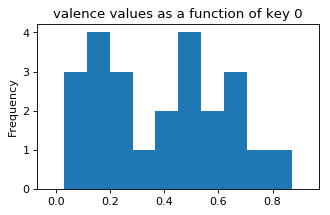

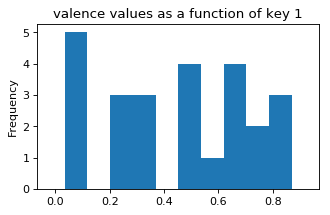

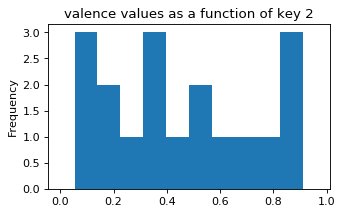

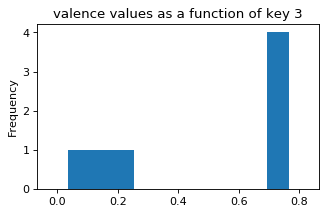

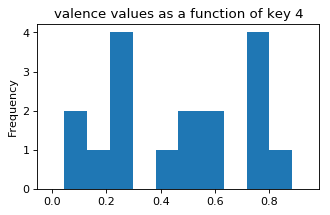

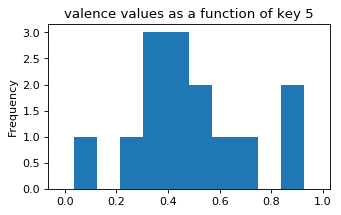

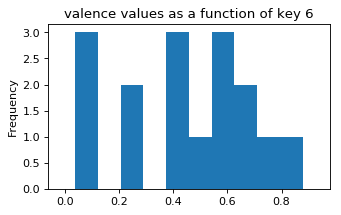

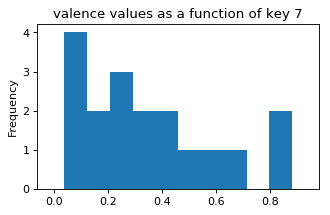

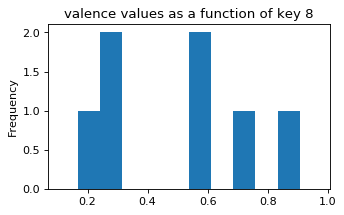

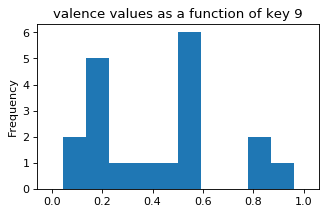

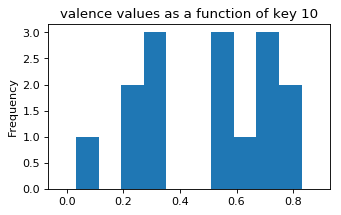

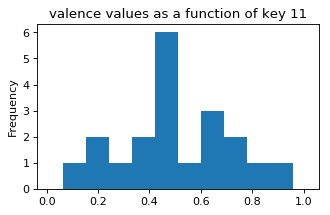

In [74]:
fig = plt.figure(figsize=(10, 6), dpi=80, facecolor='w', edgecolor='black')
ax = fig.add_subplot(221)
ax.set_title('valence values as a function of key 0')
values = sampledData[sampledData[feature] == 0]['valence']
values.plot.hist(density=False, ax=ax)
ax.set_xlim([values.min() - 0.1, values.max() + 0.1])
plt.show()


key_values = range(1,12)
for key in key_values:
    plot_hist('key', False, key)

### Question 4

In [184]:
matrix = sampledData.to_numpy()
x = matrix[:,[0,1,2]]
x = np.append(np.ones((200,1)), x, axis=1)
y = matrix[:, -1].copy()

In [76]:
linreg = sm.OLS(y,x).fit()

In [77]:
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     6.603
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           0.000284
Time:                        13:09:31   Log-Likelihood:               -0.74965
No. Observations:                 200   AIC:                             9.499
Df Residuals:                     196   BIC:                             22.69
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5254      0.043     12.111      0.000       0.440       0.611
x1             0.0123      0.003      4.276      0.000       0.007       0.018
x2             0.0085      0.190      0.045      0.965      -0.366       0.383
x3             0.0031      0.005      0.668      0.505      -0.006       0.012
==============================================================================
Omnibus:                       14.347   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                6.578
Skew:                           0.209   Prob(JB):                       0.0373
Kurtosis:                       2.216   Cond. No.                         120.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### We got the following model:
$$ Y_{valence}=0.5254 + 0.0123x_{loudness} + 0.0085x_{speechiness} + 0.0031x_{key} $$
$$ \hat\beta_{sample}=(0.5254, 0.0123, 0.0085, 0.0031) $$

##### For one unit increase in variable 'loudness' the explained variable 'valence' will increase in 0.0123
##### For one unit increase in variable 'speechiness' the explained variable 'valence' will increase in 0.0085
##### For one unit increase in variable 'key' the explained variable 'valence' will increase in 0.0031

### Question 5

Anova Table

In [78]:
variance_analysis_table = pd.DataFrame({'Source': ['Regression','Residuals','Total'], 'SS': [linreg.ess,linreg.ssr,linreg.ssr + linreg.ess], 'df': [linreg.df_model,linreg.df_resid,(linreg.df_model+linreg.df_resid)], 'MS': [(linreg.ess/linreg.df_model),(linreg.ssr/linreg.df_resid),((linreg.ssr + linreg.ess)/(linreg.df_model+linreg.df_resid))], 'F-Ratio':[6.603, None, None], 'P-Value': [0.000284, None, None]})
variance_analysis_table

,Source,SS,df,MS,F-Ratio,P-Value
0,Regression,1.192442,3.0,0.397481,6.603,0.000284
1,Residuals,11.798079,196.0,0.060194,NaN,NaN
2,Total,12.990522,199.0,0.065279,NaN,NaN


$R^2$=

In [79]:
linreg.rsquared

0.09179324444791803

$R^2_{adj}$=

In [80]:
linreg.rsquared_adj

0.0778921206384473

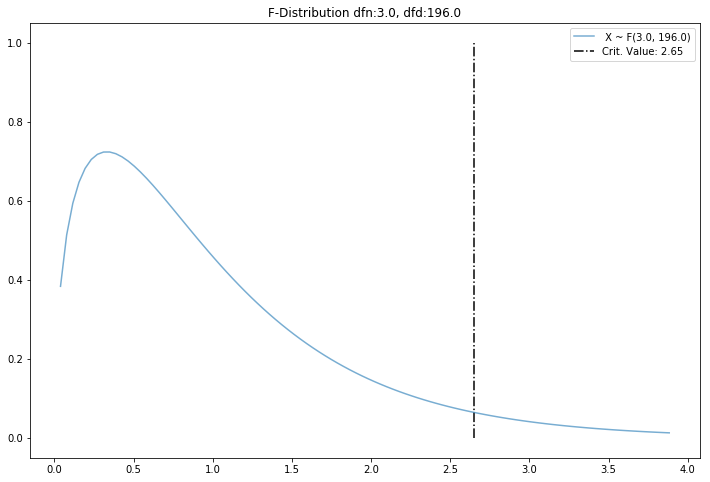

In [81]:
from scipy.stats import f, norm

def plot_f_distrubiton(dfreg, dfres):
    # Set figure 
    plt.figure(figsize=(12, 8))
    
    # Set degrees of freedom
    dfn, dfd = dfreg, dfres
    rejection_reg = f.ppf(q=.95, dfn=dfn, dfd=dfd)
    mean, var, skew, kurt = f.stats(dfn, dfd, moments='mvsk')
    
    x = np.linspace(f.ppf(0.01, dfn, dfd), 
                    f.ppf(0.99, dfn, dfd), 100)
    
    # Plot values
    plt.plot(x, f.pdf(x, dfn, dfd), alpha=0.6, 
             label=' X ~ F({}, {})'.format(dfn, dfd))
    plt.vlines(rejection_reg, 0.0, 1.0, 
               linestyles="dashdot", label="Crit. Value: {:.2f}".format(rejection_reg))
    plt.legend()
    plt.title('F-Distribution dfn:{}, dfd:{}'.format(dfn, dfd))
plot_f_distrubiton(linreg.df_model, linreg.df_resid)

##### We can see that we should reject ${H_0}$ if our test statistic F is larger than 2.65 
##### In our model summary we can see that our F-statistic is calculated as 6.603 and thus we reject the null hypothesis
##### Additionally, we see that our p-value is quite small indicating that we indeed can reject the null hypothesis with high confidence

### Question 6

In [82]:
matrix_full = modelData.to_numpy()
xfull = matrix_full[:,[0,1,2]]
xfull = np.append(np.ones((matrix_full.shape[0],1)), xfull, axis=1)
yfull = matrix_full[:, -1].copy()

In [83]:
linreg_full = sm.OLS(yfull,xfull).fit()

In [84]:
linreg_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     252.9
Date:                Mon, 01 Jun 2020   Prob (F-statistic):          4.36e-155
Time:                        13:09:32   Log-Likelihood:                 259.36
No. Observations:                6398   AIC:                            -510.7
Df Residuals:                    6394   BIC:                            -483.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5497      0.007     73.376      0.000       0.535       0.564
x1             0.0152      0.001     27.121      0.000       0.014       0.016
x2             0.0355      0.030      1.179      0.238      -0.024       0.095
x3             0.0011      0.001      1.332      0.183      -0.001       0.003
==============================================================================
Omnibus:                      360.264   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.637
Skew:                           0.260   Prob(JB):                     2.44e-42
Kurtosis:                       2.330   Cond. No.                         109.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### We got the following full model:
$$ Y_{valence}=0.5497 + 0.0152x_{loudness} + 0.0355x_{speechiness} + 0.0011x_{key} $$
$$ \beta^*_{full}=(0.5497, 0.0152, 0.0355, 0.0011) $$

In [141]:
def beta_confidence_interval(x, beta, z_normal):
    x = x.reshape(-1,1)
    C = np.linalg.inv(np.dot(x.T, x))
    left_limit = beta - z_normal * np.sqrt(np.dot((linreg.ssr/linreg.df_resid),C))
    right_limit = beta + z_normal * np.sqrt(np.dot((linreg.ssr/linreg.df_resid),C))
    return [left_limit.tolist()[0][0], right_limit.tolist()[0][0]]

In [142]:
for i, beta_hat in enumerate([0.5254, 0.0123, 0.0085, 0.0031]):
    print('confidence interval with 95% confidence for real beta_{}* is {}'.format(i, beta_confidence_interval(x[:,i], beta_hat, 1.96)))

confidence interval with 95% confidence for real beta_0* is [0.4913968855997835, 0.5594031144002165]
confidence interval with 95% confidence for real beta_1* is [-0.035616705034022554, 0.06021670503402255]
confidence interval with 95% confidence for real beta_2* is [-0.04921486779028628, 0.06621486779028629]
confidence interval with 95% confidence for real beta_3* is [-0.04043652675805044, 0.04663652675805044]


### CI is wrong - needs to be fixed

In [190]:
def beta_confidence_interval_fix(i, x, beta, z_normal):
    C = np.linalg.inv(np.dot(x.T, x))
    left_limit = beta - z_normal * np.sqrt((linreg.ssr/linreg.df_resid) * C[i][i])
    right_limit = beta + z_normal * np.sqrt((linreg.ssr/linreg.df_resid) * C[i][i])
    return [left_limit.tolist(), right_limit.tolist()]

In [191]:
for i, beta_hat in enumerate(linreg.params):
    print('confidence interval with 95% confidence for real beta_{}* is {}'.format(i, beta_confidence_interval_fix(i, x, beta_hat, 1.96)))

confidence interval with 95% confidence for real beta_0* is [0.38603366526557537, 0.6647970032156558]
confidence interval with 95% confidence for real beta_1* is [-0.12519329255422487, 0.14978417045625328]
confidence interval with 95% confidence for real beta_2* is [-0.1654220974906501, 0.18233578944952536]
confidence interval with 95% confidence for real beta_3* is [-0.06692589547397476, 0.07319363159288345]


#### All betas $\beta_0^*, \beta_1^* , \beta_2^*, \beta_3^*$ are inside their respected confidence intervals.

### Question 7
We will use Wald test which is defined as the following: 
$$ H_0: \beta_i^* = 0 $$
$$ H_1: \beta_i^* \neq 0 $$
$$ T.S: W = \frac{\hat\beta_i - \beta_i^*}{\sqrt{\hat{\sigma_{\epsilon}^2}C_{ii}}} $$
$$ R.R: |W| > z_{\alpha/2} $$
To determine if each parameter of the model is 0 or not.

In [87]:
def calc_test_statistic(beta, i, C, sigma):
    test_statistic = beta / np.sqrt(sigma * C[i][i])
    return test_statistic

In [88]:
C = np.linalg.inv(np.dot(x.T, x))
for i, beta_hat in enumerate(linreg.params):
    print('Test statistic for beta{} is: {}'.format(i, calc_test_statistic(beta_hat, i, C, linreg.ssr/linreg.df_resid)))

Test statistic for beta0 is: 12.111011171373356
Test statistic for beta1 is: 4.276262458751579
Test statistic for beta2 is: 0.04455102916521829
Test statistic for beta3 is: 0.6680574261120787


#### We see that $\beta_0^*,\beta_1^*$ of the test statistics for $\beta_i^*$ are larger than $z_{\alpha/2}=1.96$ and thus we conclude that we reject the null hypothesis $H_0$ for i=0,1
#### but we cannot reject the null hypothesis for i=2,3
#### Meaning that $\beta_2^*,\beta_3^*$ might be zero.

### Question 8

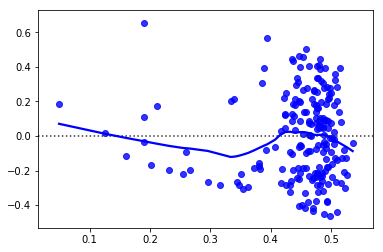

In [89]:
y_pred = linreg.predict(x)
sns.residplot(y_pred , y - y_pred , lowess=True, color="b")

#### The linearity assumption seem to hold since the points are near e=0.
#### It seems that the constant variance does not hold.

### Question 9

In [90]:
biggerSampledData = pd.concat([modelData, sampledData]).drop_duplicates(keep=False).sample(1000, random_state=1)

In [91]:
matrix_new = biggerSampledData.to_numpy()
x_new = matrix_new[:,[0,1,2]]
x_new = np.append(np.ones((1000,1)), x_new, axis=1)
y_new = matrix_new[:, -1].copy()

In [92]:
biggerLinReg = sm.OLS(y_new,x_new).fit()

In [93]:
biggerLinReg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     52.15
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           2.60e-31
Time:                        13:09:32   Log-Likelihood:                 46.180
No. Observations:                1000   AIC:                            -84.36
Df Residuals:                     996   BIC:                            -64.73
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5518      0.019     29.582      0.000       0.515       0.588
x1             0.0172      0.001     11.990      0.000       0.014       0.020
x2             0.1474      0.072      2.057      0.040       0.007       0.288
x3             0.0029      0.002      1.433      0.152      -0.001       0.007
==============================================================================
Omnibus:                       55.035   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.475
Skew:                           0.309   Prob(JB):                     5.38e-08
Kurtosis:                       2.351   Cond. No.                         103.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
y_new_pred = biggerLinReg.predict(x_new)

In [95]:
def pred_confidence_interval(x_new, sample_x_new, ypred_new, z_normal):

    C = np.linalg.inv(np.matmul(x_new.T, x_new))
    left_limit = ypred_new - z_normal * np.sqrt((linreg.ssr/linreg.df_resid) * (np.matmul(np.matmul(sample_x_new.T, C), sample_x_new) + 1))
    right_limit = ypred_new + z_normal * np.sqrt((linreg.ssr/linreg.df_resid) * (np.matmul(np.matmul(sample_x_new.T, C), sample_x_new) + 1))
    
    return [left_limit.tolist(), right_limit.tolist()]

In [96]:
confidence_intervals = {}

for index in range(len(x_new)):
    confidence_intervals[y_new[index]] = pred_confidence_interval(x_new, x_new[index], y_new_pred[index], 1.96)

In [97]:
def calc_ci_percentage(confidence_intervals):
    percentage = 0
    for yreal, ci in confidence_intervals.items():
        if yreal <= ci[1] and yreal >= ci[0]:
            percentage += 1
    percentage = percentage / len(confidence_intervals)
    return percentage
print('out of our 1000 samples {}% of the real y value are inside their respected ci'.format(calc_ci_percentage(confidence_intervals)*100))

out of our 1000 samples 97.77070063694268% of the real y value are inside their respected ci


#### It appears that our data is noisy since our confidence intervals are quite wide in range. Additionally, it seems our intervals capture the real value inside. 

### Question 10

In [98]:
moreFeaturesData = musicData[['loudness','speechiness','key','valence']].copy()

In [99]:
moreFeaturesData['loudness speechiness'] = moreFeaturesData['loudness'] * moreFeaturesData['speechiness']
moreFeaturesData['loudness key'] = moreFeaturesData['loudness'] * moreFeaturesData['key']
moreFeaturesData['speechiness key'] = moreFeaturesData['speechiness'] * moreFeaturesData['key']

In [100]:
x_more_features = moreFeaturesData.loc[:, moreFeaturesData.columns != 'valence'].to_numpy()
x_more_features = np.append(np.ones((len(moreFeaturesData),1)), x_more_features, axis=1)
y_more = moreFeaturesData['valence'].values

In [101]:
featuresLinReg = sm.OLS(y_more,x_more_features).fit()

In [102]:
featuresLinReg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     135.6
Date:                Mon, 01 Jun 2020   Prob (F-statistic):          3.66e-162
Time:                        13:09:32   Log-Likelihood:                 283.90
No. Observations:                6398   AIC:                            -553.8
Df Residuals:                    6391   BIC:                            -506.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5834      0.012     49.219      0.000       0.560       0.607
x1             0.0187      0.001     16.083      0.000       0.016       0.021
x2            -0.4588      0.082     -5.567      0.000      -0.620      -0.297
x3             0.0005      0.002      0.311      0.756      -0.003       0.004
x4            -0.0600      0.009     -6.776      0.000      -0.077      -0.043
x5          9.265e-05      0.000      0.595      0.552      -0.000       0.000
x6             0.0136      0.008      1.646      0.100      -0.003       0.030
==============================================================================
Omnibus:                      358.219   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.292
Skew:                           0.265   Prob(JB):                     1.06e-42
Kurtosis:                       2.334   Cond. No.                     1.70e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [103]:
print('Full model without interaction BIC: {}'.format(linreg_full.bic))
print('Full model with interaction BIC: {}'.format(featuresLinReg.bic))
print('Full model without interaction AIC: {}'.format(linreg_full.aic))
print('Full model with interaction AIC: {}'.format(featuresLinReg.aic))

Full model without interaction BIC: -483.6698866366908
Full model with interaction BIC: -506.46063732597645
Full model without interaction AIC: -510.72484951872866
Full model with interaction AIC: -553.8068223695427


#### We chose to use statsmodels to calculate AIC/BIC. In it we need to minimize instead of maximize the function since it is multiplied by -1 from the function we studied in class.
#### We know we want to min the BIC/AIC critetion. We see that BIC/AIC for the model with added interaction has a lower value than the previous model.
#### We conclude that the model with added interaction is better, the model with $X_{loudness},X_{speechiness},X_{key}$ only is worse.

## Second Section - Logistic Regression

### Question 1

We would like to check how energy, danceabillity and mode affect the target. <br>

The feature 'energy' is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks.<br>
The feature 'danceability' describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.<br>
The feature 'mode' indicates the modality (major or minor) of a track, the type of scale from which its melodic content is.<br>
Finally, the target variable for the track. It can be either '0' or '1'. '1' implies that this song has featured in the weekly list (Issued by Billboards) of Hot-100 tracks in that decade at least once and is therefore a 'hit'. '0' Implies that the track is a 'flop'.<br>

$$ E[Y_{target}|x_i]=\pi(\beta_0 + \beta_1energy_{i} + \beta_2danceabillity_{i} + \beta_3mode_{i}) $$

### Question 2
We sampled 200 rows from the dataset

In [104]:
continuous_vars = ['energy','danceability']
binary_vars = ['mode','target']
all_vars = continuous_vars + binary_vars
modelData = musicData[all_vars]
sampledData = modelData.sample(200, random_state=1)

### Question 3

#### 3A

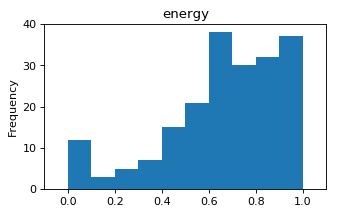

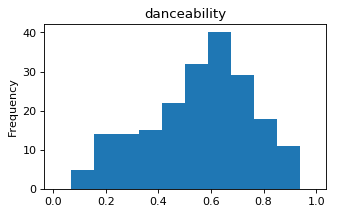

In [105]:
for feature in continuous_vars:
    plot_hist(feature, False)

In [106]:
for feature in binary_vars:
    print(f'\n\'{feature}\' variable:')
    print(sampledData.describe()[feature])


'mode' variable:
count    200.000000
mean       0.610000
std        0.488974
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: mode, dtype: float64

'target' variable:
count    200.00000
mean       0.49500
std        0.50123
min        0.00000
25%        0.00000
50%        0.00000
75%        1.00000
max        1.00000
Name: target, dtype: float64


#### 3B
##### There is no missing data in our sampled data

In [107]:
print(sampledData.isnull().values.any())

False


##### We see that only the 'target' feature is definitely semetric and the 'mode' feature is somewhat semetric, while 'energy' and 'danceability' are not semetric.

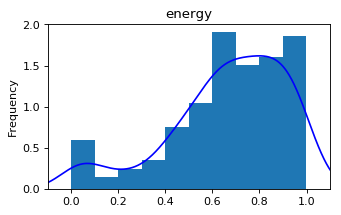

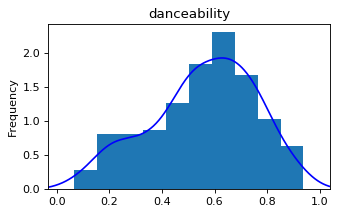

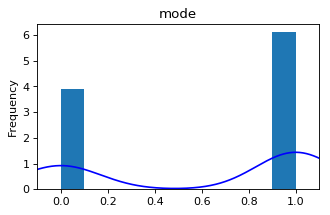

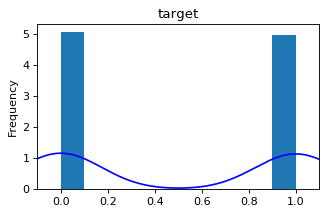

In [108]:
for feature in all_vars:
    plot_hist(feature, True)

#### 3C

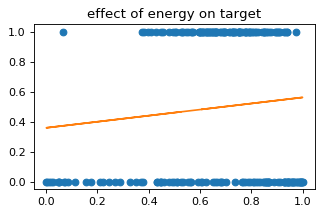

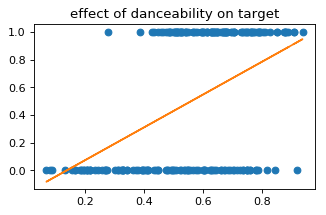

In [109]:
for feature in continuous_vars:
    plot_fit_x_y(feature, 'target')

##### We can see that the feature 'danceability' has the largest impact on our 'target'.

### Question 4

In [110]:
matrix = sampledData.to_numpy()

x = matrix[:,[0,1,2]]
x = np.append(np.ones((200,1)), x, axis=1)
y = matrix[:, -1].copy()

logit = sm.Logit(y, x).fit()

logit.summary()

Optimization terminated successfully.
         Current function value: 0.569304
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  200
Model:                          Logit   Df Residuals:                      196
Method:                           MLE   Df Model:                            3
Date:                Mon, 01 Jun 2020   Pseudo R-squ.:                  0.1786
Time:                        13:09:35   Log-Likelihood:                -113.86
converged:                       True   LL-Null:                       -138.62
                                        LLR p-value:                 1.012e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6247      0.817     -4.434      0.000      -5.227      -2.022
x1             0.5359      0.705      0.760      0.447      -0.847       1.918
x2             5.8669      1.007      5.827      0.000       3.893       7.840
x3            -0.0965      0.334     -0.289      0.772      -0.751       0.558
==============================================================================
"""

$$ \hat\beta_{full}=(-3.6247, 0.5359, 5.8669, -0.0965) $$


For one unit increase in variable 'energy' the explained variable 'target' will increase in exp(0.5359) <br>
For one unit increase in variable 'danceabillity' the explained variable 'target' will increase in exp(5.86692) <br>
For one unit increase in variable 'mode' the explained variable 'target' will increase in exp(-0.09653)

### Question 5

In [111]:
matrix_full = modelData.to_numpy()
xfull = matrix_full[:,[0,1,2]]
xfull = np.append(np.ones((matrix_full.shape[0],1)), xfull, axis=1)
yfull = matrix_full[:, -1].copy()

logit_full = sm.Logit(yfull,xfull).fit()
logit_full.summary()

Optimization terminated successfully.
         Current function value: 0.611147
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 6398
Model:                          Logit   Df Residuals:                     6394
Method:                           MLE   Df Model:                            3
Date:                Mon, 01 Jun 2020   Pseudo R-squ.:                  0.1183
Time:                        13:09:35   Log-Likelihood:                -3910.1
converged:                       True   LL-Null:                       -4434.8
                                        LLR p-value:                3.685e-227
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.1477      0.137    -22.983      0.000      -3.416      -2.879
x1             0.4081      0.120      3.412      0.001       0.174       0.643
x2             4.7064      0.164     28.698      0.000       4.385       5.028
x3             0.2757      0.057      4.818      0.000       0.164       0.388
==============================================================================
"""

$$ \hat\beta_{full}=(-3.1477, 0.4081, 4.7064, 0.2757) $$

In [112]:
beta = logit.params
est_pi = np.array([1/(np.exp(-pi_i) + 1)
                   for pi_i in np.dot(beta.reshape(1, -1), x.T)])
est_pi = [est_pi_i*(1-est_pi_i) for est_pi_i in est_pi[0]]
V = np.diag(est_pi)
C = np.linalg.inv(np.dot(np.dot(x.T, V), x))


def beta_confidence_interval(beta_i, C_ii, z_normal):
    sqrt = math.sqrt(abs(C_ii))
    lower_bound = beta_i - z_normal * sqrt
    upper_bound = beta_i + z_normal * sqrt
    return(lower_bound, upper_bound)


for i, beta_hat in enumerate(beta):
    conf = beta_confidence_interval(beta_hat,C[i][i] ,1.96)
    print(f'\nconfidence interval with 95% confidence for real beta_{i}* is {conf}')
    if logit_full.params[i] >= conf[0] and logit_full.params[i] <= conf[1]:
        print(f'The full data beta_{i} {logit_full.params[i]} is in confidence interval')
    else:
        print(f'The full data beta_{i} {logit_full.params[i]} is not in confidence interval')


confidence interval with 95% confidence for real beta_0* is (-5.226868893253108, -2.022436499367319)
The full data beta_0 -3.147697602986173 is in confidence interval

confidence interval with 95% confidence for real beta_1* is (-0.8466130632934127, 1.9184153158316142)
The full data beta_1 0.40808778880843666 is in confidence interval

confidence interval with 95% confidence for real beta_2* is (3.8933211611754137, 7.8404790575503105)
The full data beta_2 4.706397282073588 is in confidence interval

confidence interval with 95% confidence for real beta_3* is (-0.7505650110089549, 0.5575323264951374)
The full data beta_3 0.2756697950405461 is in confidence interval


### Question 6

In [113]:
Z = np.vstack([np.ones((musicData.shape[0], )),
               musicData['energy'],
               musicData['danceability'],
               musicData['mode'],
               musicData['energy']*musicData['danceability'],
               musicData['energy']*musicData['mode'],
               musicData['danceability']*musicData['mode']]).T

y_Z = musicData['target'].to_numpy().reshape(-1, 1)

logit_Z = sm.Logit(y_Z, Z).fit()
logit_Z.summary()

Optimization terminated successfully.
         Current function value: 0.610825
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 6398
Model:                          Logit   Df Residuals:                     6391
Method:                           MLE   Df Model:                            6
Date:                Mon, 01 Jun 2020   Pseudo R-squ.:                  0.1188
Time:                        13:09:35   Log-Likelihood:                -3908.1
converged:                       True   LL-Null:                       -4434.8
                                        LLR p-value:                2.522e-224
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.7304      0.289     -9.442      0.000      -3.297      -2.164
x1            -0.1358      0.385     -0.353      0.724      -0.889       0.618
x2             4.2999      0.490      8.782      0.000       3.340       5.260
x3            -0.1397      0.266     -0.526      0.599      -0.661       0.381
x4             0.4803      0.659      0.729      0.466      -0.811       1.771
x5             0.4640      0.252      1.838      0.066      -0.031       0.959
x6             0.1735      0.339      0.511      0.609      -0.491       0.838
==============================================================================
"""

In [114]:
print(f'Full model BIC = {logit_full.bic}')
print(f'New model BIC = {logit_Z.bic}')

Full model BIC = 7855.295264095067
New model BIC = 7877.461286295962


We used statsmodel implementation again for bic which tries to minimize and thus we choose the better model based on the lower bic. <br>
We can see that the full model is a little bit better then the new one.